In [4]:
import numpy as np
import pandas as pd


In [5]:
seasons = [str(season) for season in range(2014,2023)]
print(f'number of seasons={len(seasons)}')

teams = ['crd','atl','rav','buf','car','chi','cin','cle','dal','den','det','gnb','htx','clt','jax','kan',
         'rai','sdg','ram','mia','min','nwe','nor','nyg','nyj','phi','pit','sfo','sea','tam','oti','was']

print(f'number of teams={len(teams)}')

number of seasons=9
number of teams=32


In [ ]:
import random
import time

nfl_df = pd.DataFrame()

for season in seasons:
  for team in teams:
    url = 'https://www.pro-football-reference.com/teams/' + team + '/' + season + '/gamelog/'
    print(url)

    # Go through and scrape the stats for each season and team
    off_df = pd.read_html(url, header=1, attrs={'id':'gamelog' + season})[0]

    def_df = pd.read_html(url, header=1, attrs={'id':'gamelog_opp' + season})[0]

    team_df = pd.concat([off_df, def_df], axis=1)

    team_df.insert(loc=0, column='Season', value=season)

    team_df.insert(loc=2, column='Team', value=team.upper())

    nfl_df = pd.concat([nfl_df, team_df], ignore_index=True)

    # Put code to sleep to avoid scrapping problems
    time.sleep(random.randint(7, 8))


In [4]:
nfl_df.to_csv('nfl_scraper.csv', index=False)

In [6]:
nfl_df = pd.read_csv('nfl_scraper.csv')
print(nfl_df.shape)

(4670, 74)


In [17]:
nfl_pts_df = nfl_df.drop(nfl_df.columns[12:], axis=1)
nfl_pts_df = nfl_pts_df.drop(nfl_pts_df.columns[5:6], axis=1)

In [18]:
print(nfl_pts_df.shape)

(4670, 11)


In [19]:
column_names = {'Unnamed: 4':'Win', 'Unnamed: 6':'Home', 'Tm':'Off_Pts', 'Opp.1':'Def_Pts'} 
nfl_pts_df = nfl_pts_df.rename(columns=column_names)
print(nfl_pts_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   4670 non-null   int64 
 1   Week     4670 non-null   int64 
 2   Team     4670 non-null   object
 3   Day      4670 non-null   object
 4   Date     4670 non-null   object
 5   Win      4670 non-null   object
 6   OT       268 non-null    object
 7   Home     2335 non-null   object
 8   Opp      4670 non-null   object
 9   Off_Pts  4670 non-null   int64 
 10  Def_Pts  4670 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 401.5+ KB
None


In [20]:
team_dict = {'Arizona Cardinals':'CRD', 'Atlanta Falcons':'ATL', 'Baltimore Ravens':'RAV',
             'Buffalo Bills':'BUF', 'Carolina Panthers':'CAR', 'Chicago Bears':'CHI',
             'Cincinnati Bengals':'CIN', 'Cleveland Browns':'CLE', 'Dallas Cowboys':'DAL',
             'Denver Broncos':'DEN', 'Detroit Lions':'DET', 'Green Bay Packers':'GNB',
             'Houston Texans':'HTX', 'Indianapolis Colts':'CLT', 'Jacksonville Jaguars':'JAX',
             'Kansas City Chiefs':'KAN', 'Los Angeles Chargers':'SDG', 'Los Angeles Rams':'RAM',
             'Las Vegas Raiders':'RAI', 'Oakland Raiders':'RAI', 'Miami Dolphins':'MIA',
             'Minnesota Vikings':'MIN', 'New England Patriots':'NWE', 'New Orleans Saints':'NOR',
             'New York Giants':'NYG', 'New York Jets':'NYJ', 'Philadelphia Eagles':'PHI',
             'Pittsburgh Steelers':'PIT', 'St. Louis Rams':'RAM', 'San Diego Chargers':'SDG',
             'San Francisco 49ers':'SFO', 'Seattle Seahawks':'SEA', 'Tampa Bay Buccaneers':'TAM',
             'Tennessee Titans':'OTI', 'Washington Commanders':'WAS', 'Washington Football Team':'WAS',
             'Washington Redskins':'WAS'}
nfl_pts_df = nfl_pts_df.replace({'Opp': team_dict})

In [21]:
nfl_pts_df['Win'] = nfl_pts_df['Win'].apply(lambda x: 1 if x == 'W' else 0)

nfl_pts_df['OT'] = nfl_pts_df['OT'].apply(lambda x: 1 if x == 'OT' else 0)

nfl_pts_df['Home'] = nfl_pts_df['Home'].apply(lambda x: 0 if x == '@' else 1)

In [22]:
print(nfl_pts_df)

      Season  Week Team  Day          Date  Win  OT  Home  Opp  Off_Pts  \
0       2014     1  CRD  Mon   September 8    1   0     1  SDG       18   
1       2014     2  CRD  Sun  September 14    1   0     0  NYG       25   
2       2014     3  CRD  Sun  September 21    1   0     1  SFO       23   
3       2014     5  CRD  Sun     October 5    0   0     0  DEN       20   
4       2014     6  CRD  Sun    October 12    1   0     1  WAS       30   
...      ...   ...  ...  ...           ...  ...  ..   ...  ...      ...   
4665    2022    13  WAS  Sun    December 4    0   1     0  NYG       20   
4666    2022    15  WAS  Sun   December 18    0   0     1  NYG       12   
4667    2022    16  WAS  Sat   December 24    0   0     0  SFO       20   
4668    2022    17  WAS  Sun     January 1    0   0     1  CLE       10   
4669    2022    18  WAS  Sun     January 8    1   0     1  DAL       26   

      Def_Pts  
0          17  
1          14  
2          14  
3          41  
4          20  
...

In [ ]:
import random 
import time 

veg_df = pd.DataFrame()

for season in seasons:
    for team in teams:
        url = 'https://www.pro-football-reference.com/teams/' + team + '/' + season + '_lines.htm'
        print(url)

        lines_df = pd.read_html(url, header=0, attrs={'id':'vegas_lines'})[0]

        lines_df.insert(loc=0, column='Season', value=season)

        lines_df.insert(loc=2, column='Team', value=team.upper())

        veg_df = pd.concat([veg_df, lines_df], ignore_index=True)

        time.sleep(random.randint(7, 8))

print(veg_df)

In [16]:
veg_df.to_csv('nfl_vegas_lines.csv', index=False)

In [9]:
veg_df = pd.read_csv('nfl_vegas_lines.csv')

print(veg_df.shape)

(4880, 9)


In [10]:
veg_df = veg_df.drop(veg_df.columns[6:], axis=1)
print(veg_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880 entries, 0 to 4879
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      4880 non-null   int64  
 1   G#          4880 non-null   int64  
 2   Team        4880 non-null   object 
 3   Opp         4880 non-null   object 
 4   Spread      4880 non-null   float64
 5   Over/Under  4880 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 228.9+ KB
None


In [11]:
column_names = {'G#':'G', 'Over/Under':'Total'}
veg_df = veg_df.rename(columns=column_names)
print(veg_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4880 entries, 0 to 4879
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  4880 non-null   int64  
 1   G       4880 non-null   int64  
 2   Team    4880 non-null   object 
 3   Opp     4880 non-null   object 
 4   Spread  4880 non-null   float64
 5   Total   4880 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 228.9+ KB
None


In [12]:
veg_df = veg_df.query('(Season <= 2020 and G < 17) or (Season >= 2021 and G < 18)')
print(veg_df.shape)

(4670, 6)


In [13]:
veg_df['Home'] = veg_df['Opp'].apply(lambda x: 0 if x[0] == '@' else 1)

In [14]:
veg_df['Opp'] = veg_df['Opp'].apply(lambda x: x[1:] if x[0] == '@' else x)

abbr_dict = {'OAK':'RAI', 'LVR':'RAI', 'STL':'RAM', 'LAR':'RAM', 'LAC':'SDG',
             'IND':'CLT', 'HOU':'HTX', 'BAL':'RAV', 'ARI':'CRD', 'TEN':'OTI'}
veg_df = veg_df.replace({'Opp': abbr_dict})

In [15]:
print(nfl_pts_df.shape)
print(veg_df.shape)

(4670, 11)
(4670, 7)


In [24]:
merged_df = pd.merge(nfl_pts_df, veg_df, on=['Season','Team','Opp','Home'])

In [25]:
print(nfl_pts_df.query('Season == 2014 and Team == "CRD"'))
print(veg_df.query('Season == 2014 and Team == "CRD"')) 
print(merged_df.query('Season == 2014 and Team == "CRD"'))                      

    Season  Week Team  Day          Date  Win  OT  Home  Opp  Off_Pts  Def_Pts
0     2014     1  CRD  Mon   September 8    1   0     1  SDG       18       17
1     2014     2  CRD  Sun  September 14    1   0     0  NYG       25       14
2     2014     3  CRD  Sun  September 21    1   0     1  SFO       23       14
3     2014     5  CRD  Sun     October 5    0   0     0  DEN       20       41
4     2014     6  CRD  Sun    October 12    1   0     1  WAS       30       20
5     2014     7  CRD  Sun    October 19    1   0     0  RAI       24       13
6     2014     8  CRD  Sun    October 26    1   0     1  PHI       24       20
7     2014     9  CRD  Sun    November 2    1   0     0  DAL       28       17
8     2014    10  CRD  Sun    November 9    1   0     1  RAM       31       14
9     2014    11  CRD  Sun   November 16    1   0     1  DET       14        6
10    2014    12  CRD  Sun   November 23    0   0     0  SEA        3       19
11    2014    13  CRD  Sun   November 30    0   0   

In [26]:
merged_df.to_csv('nfl_pts_and-vegas.csv', index=False)

In [1]:
import numpy as np
import pandas as pd

In [2]:
seasons = [str(season) for season in range(2023,2024)]
print(f'number of seasons={len(seasons)}')

teams = ['crd','atl','rav','buf','car','chi','cin','cle','dal','den','det','gnb','htx','clt','jax','kan',
         'rai','sdg','ram','mia','min','nwe','nor','nyg','nyj','phi','pit','sfo','sea','tam','oti','was']

print(f'number of teams={len(teams)}')

number of seasons=1
number of teams=32


In [3]:
import random
import time

nfl_df = pd.DataFrame()

for season in seasons:
  for team in teams:
    url = 'https://www.pro-football-reference.com/teams/' + team + '/' + season + '/gamelog/'
    print(url)

    # Go through and scrape the stats for each season and team
    off_df = pd.read_html(url, header=1, attrs={'id':'gamelog' + season})[0]

    def_df = pd.read_html(url, header=1, attrs={'id':'gamelog_opp' + season})[0]

    team_df = pd.concat([off_df, def_df], axis=1)

    team_df.insert(loc=0, column='Season', value=season)

    team_df.insert(loc=2, column='Team', value=team.upper())

    nfl_df = pd.concat([nfl_df, team_df], ignore_index=True)

    # Put code to sleep to avoid scrapping problems
    time.sleep(random.randint(7, 8))

https://www.pro-football-reference.com/teams/crd/2023/gamelog/
https://www.pro-football-reference.com/teams/atl/2023/gamelog/
https://www.pro-football-reference.com/teams/rav/2023/gamelog/
https://www.pro-football-reference.com/teams/buf/2023/gamelog/
https://www.pro-football-reference.com/teams/car/2023/gamelog/
https://www.pro-football-reference.com/teams/chi/2023/gamelog/
https://www.pro-football-reference.com/teams/cin/2023/gamelog/
https://www.pro-football-reference.com/teams/cle/2023/gamelog/
https://www.pro-football-reference.com/teams/dal/2023/gamelog/
https://www.pro-football-reference.com/teams/den/2023/gamelog/
https://www.pro-football-reference.com/teams/det/2023/gamelog/
https://www.pro-football-reference.com/teams/gnb/2023/gamelog/
https://www.pro-football-reference.com/teams/htx/2023/gamelog/
https://www.pro-football-reference.com/teams/clt/2023/gamelog/
https://www.pro-football-reference.com/teams/jax/2023/gamelog/
https://www.pro-football-reference.com/teams/kan/2023/g

In [4]:
nfl_df.to_csv('nfl_games_2023.csv', index=False)

In [5]:
nfl_df = pd.read_csv('nfl_games_2023.csv')

print(nfl_df.shape)

(544, 74)


In [6]:
nfl_pts_df = nfl_df.drop(nfl_df.columns[12:], axis=1)
nfl_pts_df = nfl_pts_df.drop(nfl_pts_df.columns[5:6], axis=1)
print(nfl_pts_df.shape)

(544, 11)


In [7]:
nfl_pts_df = nfl_pts_df.dropna(subset=['Tm']).reset_index(drop=True)

In [8]:
print(nfl_pts_df.shape)

(544, 11)


In [9]:
column_names = {'Unnamed: 4':'Win', 'Unnamed: 6':'Home', 'Tm':'Off_Pts', 'Opp.1':'Def_Pts'} 
nfl_pts_df = nfl_pts_df.rename(columns=column_names)
print(nfl_pts_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Season   544 non-null    int64 
 1   Week     544 non-null    int64 
 2   Team     544 non-null    object
 3   Day      544 non-null    object
 4   Date     544 non-null    object
 5   Win      544 non-null    object
 6   OT       26 non-null     object
 7   Home     272 non-null    object
 8   Opp      544 non-null    object
 9   Off_Pts  544 non-null    int64 
 10  Def_Pts  544 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 46.9+ KB
None


In [10]:
team_dict = {'Arizona Cardinals':'CRD', 'Atlanta Falcons':'ATL', 'Baltimore Ravens':'RAV',
             'Buffalo Bills':'BUF', 'Carolina Panthers':'CAR', 'Chicago Bears':'CHI',
             'Cincinnati Bengals':'CIN', 'Cleveland Browns':'CLE', 'Dallas Cowboys':'DAL',
             'Denver Broncos':'DEN', 'Detroit Lions':'DET', 'Green Bay Packers':'GNB',
             'Houston Texans':'HTX', 'Indianapolis Colts':'CLT', 'Jacksonville Jaguars':'JAX',
             'Kansas City Chiefs':'KAN', 'Los Angeles Chargers':'SDG', 'Los Angeles Rams':'RAM',
             'Las Vegas Raiders':'RAI', 'Oakland Raiders':'RAI', 'Miami Dolphins':'MIA',
             'Minnesota Vikings':'MIN', 'New England Patriots':'NWE', 'New Orleans Saints':'NOR',
             'New York Giants':'NYG', 'New York Jets':'NYJ', 'Philadelphia Eagles':'PHI',
             'Pittsburgh Steelers':'PIT', 'St. Louis Rams':'RAM', 'San Diego Chargers':'SDG',
             'San Francisco 49ers':'SFO', 'Seattle Seahawks':'SEA', 'Tampa Bay Buccaneers':'TAM',
             'Tennessee Titans':'OTI', 'Washington Commanders':'WAS', 'Washington Football Team':'WAS',
             'Washington Redskins':'WAS'}
nfl_pts_df = nfl_pts_df.replace({'Opp': team_dict})

In [11]:
nfl_pts_df['Win'] = nfl_pts_df['Win'].apply(lambda x: 1 if x == 'W' else 0)

nfl_pts_df['OT'] = nfl_pts_df['OT'].apply(lambda x: 1 if x == 'OT' else 0)

nfl_pts_df['Home'] = nfl_pts_df['Home'].apply(lambda x: 0 if x == '@' else 1)

In [13]:
print(nfl_pts_df)

     Season  Week Team  Day          Date  Win  OT  Home  Opp  Off_Pts  \
0      2023     1  CRD  Sun  September 10    0   0     0  WAS       16   
1      2023     2  CRD  Sun  September 17    0   0     1  NYG       28   
2      2023     3  CRD  Sun  September 24    1   0     1  DAL       28   
3      2023     4  CRD  Sun     October 1    0   0     0  SFO       16   
4      2023     5  CRD  Sun     October 8    0   0     1  CIN       20   
..      ...   ...  ...  ...           ...  ...  ..   ...  ...      ...   
539    2023    13  WAS  Sun    December 3    0   0     1  MIA       15   
540    2023    15  WAS  Sun   December 17    0   0     0  RAM       20   
541    2023    16  WAS  Sun   December 24    0   0     0  NYJ       28   
542    2023    17  WAS  Sun   December 31    0   0     1  SFO       10   
543    2023    18  WAS  Sun     January 7    0   0     1  DAL       10   

     Def_Pts  
0         20  
1         31  
2         16  
3         35  
4         34  
..       ...  
539   

In [14]:
nfl_pts_df.to_csv('nfl_pts_2023.csv', index=False)

In [15]:
import random 
import time 

veg_df = pd.DataFrame()

for season in seasons:
    for team in teams:
        url = 'https://www.pro-football-reference.com/teams/' + team + '/' + season + '_lines.htm'
        print(url)

        lines_df = pd.read_html(url, header=0, attrs={'id':'vegas_lines'})[0]

        lines_df.insert(loc=0, column='Season', value=season)

        lines_df.insert(loc=2, column='Team', value=team.upper())

        veg_df = pd.concat([veg_df, lines_df], ignore_index=True)

        time.sleep(random.randint(7, 8))

print(veg_df)

https://www.pro-football-reference.com/teams/crd/2023_lines.htm
https://www.pro-football-reference.com/teams/atl/2023_lines.htm
https://www.pro-football-reference.com/teams/rav/2023_lines.htm
https://www.pro-football-reference.com/teams/buf/2023_lines.htm
https://www.pro-football-reference.com/teams/car/2023_lines.htm
https://www.pro-football-reference.com/teams/chi/2023_lines.htm
https://www.pro-football-reference.com/teams/cin/2023_lines.htm
https://www.pro-football-reference.com/teams/cle/2023_lines.htm
https://www.pro-football-reference.com/teams/dal/2023_lines.htm
https://www.pro-football-reference.com/teams/den/2023_lines.htm
https://www.pro-football-reference.com/teams/det/2023_lines.htm
https://www.pro-football-reference.com/teams/gnb/2023_lines.htm
https://www.pro-football-reference.com/teams/htx/2023_lines.htm
https://www.pro-football-reference.com/teams/clt/2023_lines.htm
https://www.pro-football-reference.com/teams/jax/2023_lines.htm
https://www.pro-football-reference.com/t

In [16]:
veg_df.to_csv('nfl_vegas_lines_2023.csv', index=False) 

In [17]:
veg_df = pd.read_csv('nfl_vegas_lines_2023.csv')

print(veg_df.shape)

(570, 9)


In [18]:
veg_df = veg_df.drop(veg_df.columns[6:], axis=1)
print(veg_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      570 non-null    int64  
 1   G#          570 non-null    int64  
 2   Team        570 non-null    object 
 3   Opp         570 non-null    object 
 4   Spread      570 non-null    float64
 5   Over/Under  538 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 26.8+ KB
None


In [20]:
column_names = {'G#':'G', 'Over/Under':'Total'}
veg_df = veg_df.rename(columns=column_names)
print(veg_df.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Season  570 non-null    int64  
 1   G       570 non-null    int64  
 2   Team    570 non-null    object 
 3   Opp     570 non-null    object 
 4   Spread  570 non-null    float64
 5   Total   538 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 26.8+ KB
None


In [21]:
veg_df = veg_df.query('(Season <= 2020 and G < 17) or (Season >= 2021 and G < 18)')
print(veg_df.shape)

(544, 6)


In [22]:
veg_df['Home'] = veg_df['Opp'].apply(lambda x: 0 if x[0] == '@' else 1)

In [23]:
veg_df['Opp'] = veg_df['Opp'].apply(lambda x: x[1:] if x[0] == '@' else x)

abbr_dict = {'OAK':'RAI', 'LVR':'RAI', 'STL':'RAM', 'LAR':'RAM', 'LAC':'SDG',
             'IND':'CLT', 'HOU':'HTX', 'BAL':'RAV', 'ARI':'CRD', 'TEN':'OTI'}
veg_df = veg_df.replace({'Opp': abbr_dict})

In [24]:
print(nfl_pts_df.shape)
print(veg_df.shape)

(544, 11)
(544, 7)


In [26]:
merged_df = pd.merge(nfl_pts_df, veg_df, on=['Season','Team','Opp','Home'])

In [27]:
print(merged_df.shape)

(544, 14)


In [28]:
print(merged_df.query('Season == 2023 and Team == "CLE"'))

     Season  Week Team  Day          Date  Win  OT  Home  Opp  Off_Pts  \
119    2023     1  CLE  Sun  September 10    1   0     1  CIN       24   
120    2023     2  CLE  Mon  September 18    0   0     0  PIT       22   
121    2023     3  CLE  Sun  September 24    1   0     1  OTI       27   
122    2023     4  CLE  Sun     October 1    0   0     1  RAV        3   
123    2023     6  CLE  Sun    October 15    1   0     1  SFO       19   
124    2023     7  CLE  Sun    October 22    1   0     0  CLT       39   
125    2023     8  CLE  Sun    October 29    0   0     0  SEA       20   
126    2023     9  CLE  Sun    November 5    1   0     1  CRD       27   
127    2023    10  CLE  Sun   November 12    1   0     0  RAV       33   
128    2023    11  CLE  Sun   November 19    1   0     1  PIT       13   
129    2023    12  CLE  Sun   November 26    0   0     0  DEN       12   
130    2023    13  CLE  Sun    December 3    0   0     0  RAM       19   
131    2023    14  CLE  Sun   December

In [29]:
merged_df.to_csv('nfl_pts_and_vegas_2023.csv', index=False)

In [30]:
merged_2014_2022_df = pd.read_csv('nfl_pts_and-vegas.csv')
merged_2023_df = pd.read_csv('nfl_pts_and_vegas_2023.csv')
print(merged_2014_2022_df.shape)
print(merged_2023_df.shape)

(4670, 14)
(544, 14)


In [31]:
merged_total_df = pd.concat([merged_2014_2022_df, merged_2023_df], ignore_index=True)
print(merged_total_df)

      Season  Week Team  Day          Date  Win  OT  Home  Opp  Off_Pts  \
0       2014     1  CRD  Mon   September 8    1   0     1  SDG       18   
1       2014     2  CRD  Sun  September 14    1   0     0  NYG       25   
2       2014     3  CRD  Sun  September 21    1   0     1  SFO       23   
3       2014     5  CRD  Sun     October 5    0   0     0  DEN       20   
4       2014     6  CRD  Sun    October 12    1   0     1  WAS       30   
...      ...   ...  ...  ...           ...  ...  ..   ...  ...      ...   
5209    2023    13  WAS  Sun    December 3    0   0     1  MIA       15   
5210    2023    15  WAS  Sun   December 17    0   0     0  RAM       20   
5211    2023    16  WAS  Sun   December 24    0   0     0  NYJ       28   
5212    2023    17  WAS  Sun   December 31    0   0     1  SFO       10   
5213    2023    18  WAS  Sun     January 7    0   0     1  DAL       10   

      Def_Pts   G  Spread  Total  
0          17   1    -3.0   45.0  
1          14   2    -2.0   4

In [32]:
merged_total_df.to_csv('nfl_pts_and_vegas_2014-2023.csv', index=False)

In [33]:
nfl_pts_veg_df = pd.read_csv('nfl_pts_and_vegas_2014-2023.csv')

print(nfl_pts_veg_df.shape)

(5214, 14)


In [34]:
nfl_pts_veg_df['Actual_Total'] = nfl_pts_veg_df['Off_Pts'] + nfl_pts_veg_df['Def_Pts']

print(nfl_pts_veg_df.shape)

(5214, 15)


In [38]:
div_dict = {'buf': 'AFCE','mia': 'AFCE','nwe': 'AFCE','nyj': 'AFCE',
            'cin': 'AFCN','cle': 'AFCN','pit': 'AFCN','rav': 'AFCN',
            'htx': 'AFCS','clt': 'AFCS','jax': 'AFCS','oti': 'AFCS',
            'den': 'AFCW','kan': 'AFCW','rai': 'AFCW','sdg': 'AFCW',
            'dal': 'NFCE','nyg': 'NFCE','phi': 'NFCE','was': 'NFCE',
            'chi': 'NFCN','det': 'NFCN','gnb': 'NFCN','min': 'NFCN',
            'atl': 'NFCS','car': 'NFCS','nor': 'NFCS','tam': 'NFCS',
            'crd': 'NFCW','ram': 'NFCW','sfo': 'NFCW','sea': 'NFCW'}

nfl_pts_veg_df['Week_Min'] = nfl_pts_veg_df.groupby(['Season','Team','Opp'])['Week'].transform('min')
nfl_pts_veg_df['Week_Max'] = nfl_pts_veg_df.groupby(['Season','Team','Opp'])['Week'].transform('max')
print(nfl_pts_veg_df[['Week','Team','Opp','Week_Min','Week_Max']].tail(32))

def calc_div_col(row):
    if div_dict[row['Team'].lower()] != div_dict[row['Opp'].lower()]:
        return 0
    if row['Week_Min'] == row['Week_Max']:
        return 1
    elif row['Week'] == row['Week_Min']:
        return 1
    else:
        return 2

nfl_pts_veg_df['Div_Game'] = nfl_pts_veg_df.apply(calc_div_col, axis=1)

nfl_pts_veg_df.pop('Week_Min')
nfl_pts_veg_df.pop('Week_Max')

print(nfl_pts_veg_df.tail(32))
print(nfl_pts_veg_df.info(verbose=True)) 

      Week Team  Opp  Week_Min  Week_Max
5182     3  OTI  CLE         3         3
5183     4  OTI  CIN         4         4
5184     5  OTI  CLT         5        13
5185     6  OTI  RAV         6         6
5186     8  OTI  ATL         8         8
5187     9  OTI  PIT         9         9
5188    10  OTI  TAM        10        10
5189    11  OTI  JAX        11        18
5190    12  OTI  CAR        12        12
5191    13  OTI  CLT         5        13
5192    14  OTI  MIA        14        14
5193    15  OTI  HTX        15        17
5194    16  OTI  SEA        16        16
5195    17  OTI  HTX        15        17
5196    18  OTI  JAX        11        18
5197     1  WAS  CRD         1         1
5198     2  WAS  DEN         2         2
5199     3  WAS  BUF         3         3
5200     4  WAS  PHI         4         8
5201     5  WAS  CHI         5         5
5202     6  WAS  ATL         6         6
5203     7  WAS  NYG         7        11
5204     8  WAS  PHI         4         8
5205     9  WAS 

In [39]:
nfl_pts_veg_df.to_csv('nfl_pts_and_vegas_2014-2023.csv', index=False)

In [2]:
nfl_pts_veg_df['Div_Game'].value_counts()

NameError: name 'nfl_pts_veg_df' is not defined

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors, LocalOutlierFactor

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
nfl_df = pd.read_csv('nfl_pts_and_vegas_2014-2023.csv')
print(nfl_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5214 entries, 0 to 5213
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        5214 non-null   int64  
 1   Week          5214 non-null   int64  
 2   Team          5214 non-null   object 
 3   Day           5214 non-null   object 
 4   Date          5214 non-null   object 
 5   Win           5214 non-null   int64  
 6   OT            5214 non-null   int64  
 7   Home          5214 non-null   int64  
 8   Opp           5214 non-null   object 
 9   Off_Pts       5214 non-null   int64  
 10  Def_Pts       5214 non-null   int64  
 11  G             5214 non-null   int64  
 12  Spread        5214 non-null   float64
 13  Total         5214 non-null   float64
 14  Actual_Total  5214 non-null   int64  
 15  Div_Game      5214 non-null   int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 651.9+ KB
None


In [3]:
nfl_df['Over'] = np.where(nfl_df['Actual_Total'] > nfl_df['Total'], 1, 0)
nfl_df['Under'] = np.where(nfl_df['Actual_Total'] < nfl_df['Total'], 1, 0)
nfl_df['Push'] = np.where(nfl_df['Actual_Total'] == nfl_df['Total'], 1, 0)
print(nfl_df)

      Season  Week Team  Day    Date  Win  OT  Home  Opp  Off_Pts  Def_Pts  \
0       2014     1  CRD  Mon   8-Sep    1   0     1  SDG       18       17   
1       2014     2  CRD  Sun  14-Sep    1   0     0  NYG       25       14   
2       2014     3  CRD  Sun  21-Sep    1   0     1  SFO       23       14   
3       2014     5  CRD  Sun   5-Oct    0   0     0  DEN       20       41   
4       2014     6  CRD  Sun  12-Oct    1   0     1  WAS       30       20   
...      ...   ...  ...  ...     ...  ...  ..   ...  ...      ...      ...   
5209    2023    13  WAS  Sun   3-Dec    0   0     1  MIA       15       45   
5210    2023    15  WAS  Sun  17-Dec    0   0     0  RAM       20       28   
5211    2023    16  WAS  Sun  24-Dec    0   0     0  NYJ       28       30   
5212    2023    17  WAS  Sun  31-Dec    0   0     1  SFO       10       27   
5213    2023    18  WAS  Sun   7-Jan    0   0     1  DAL       10       38   

       G  Spread  Total  Actual_Total  Div_Game  Over  Under  P

In [4]:
nfl_df = nfl_df.sort_values(by=['Season', 'Week']). reset_index(drop=True)
print(nfl_df)

      Season  Week Team  Day   Date  Win  OT  Home  Opp  Off_Pts  Def_Pts   G  \
0       2014     1  CRD  Mon  8-Sep    1   0     1  SDG       18       17   1   
1       2014     1  ATL  Sun  7-Sep    1   1     1  NOR       37       34   1   
2       2014     1  RAV  Sun  7-Sep    0   0     1  CIN       16       23   1   
3       2014     1  BUF  Sun  7-Sep    1   1     0  CHI       23       20   1   
4       2014     1  CAR  Sun  7-Sep    1   0     0  TAM       20       14   1   
...      ...   ...  ...  ...    ...  ...  ..   ...  ...      ...      ...  ..   
5209    2023    18  SFO  Sun  7-Jan    0   0     1  RAM       20       21  17   
5210    2023    18  SEA  Sun  7-Jan    1   0     0  CRD       21       20  17   
5211    2023    18  TAM  Sun  7-Jan    1   0     0  CAR        9        0  17   
5212    2023    18  OTI  Sun  7-Jan    1   0     1  JAX       28       20  17   
5213    2023    18  WAS  Sun  7-Jan    0   0     1  DAL       10       38  17   

      Spread  Total  Actual


Results for 2021:
 Week  1: accuracy score=56.25%
 Week  2: accuracy score=31.25%
 Week  3: accuracy score=43.75%
 Week  4: accuracy score=43.75%
 Week  5: accuracy score=56.25%
 Week  6: accuracy score=53.85%
 Week  7: accuracy score=58.33%
 Week  8: accuracy score=53.33%
 Week  9: accuracy score=69.23%
 Week 10: accuracy score=61.54%
 Week 11: accuracy score=53.33%
 Week 12: accuracy score=46.67%
 Week 13: accuracy score=21.43%
 Week 14: accuracy score=53.85%
 Week 15: accuracy score=25.00%
 Week 16: accuracy score=75.00%
 Week 17: accuracy score=60.00%
 Week 18: accuracy score=60.00%
Season 2021: Total accuracy score=50.94%

Classification Report for 2021:
              precision    recall  f1-score   support

        Over       0.48      0.47      0.47       124
       Under       0.54      0.55      0.54       141

    accuracy                           0.51       265
   macro avg       0.51      0.51      0.51       265
weighted avg       0.51      0.51      0.51       265



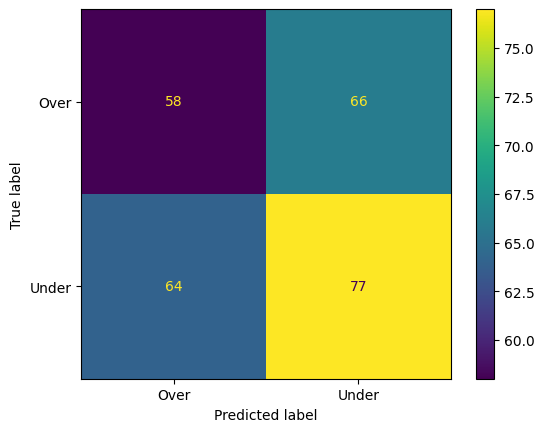


Results for 2022:
 Week  1: accuracy score=68.75%
 Week  2: accuracy score=31.25%
 Week  3: accuracy score=66.67%
 Week  4: accuracy score=50.00%
 Week  5: accuracy score=43.75%
 Week  6: accuracy score=64.29%
 Week  7: accuracy score=61.54%
 Week  8: accuracy score=50.00%
 Week  9: accuracy score=46.15%
 Week 10: accuracy score=42.86%
 Week 11: accuracy score=35.71%
 Week 12: accuracy score=56.25%
 Week 13: accuracy score=46.67%
 Week 14: accuracy score=61.54%
 Week 15: accuracy score=43.75%
 Week 16: accuracy score=42.86%
 Week 17: accuracy score=69.23%
 Week 18: accuracy score=43.75%
Season 2022: Total accuracy score=51.14%

Classification Report for 2022:
              precision    recall  f1-score   support

        Over       0.45      0.45      0.45       118
       Under       0.56      0.56      0.56       146

    accuracy                           0.51       264
   macro avg       0.51      0.51      0.51       264
weighted avg       0.51      0.51      0.51       264



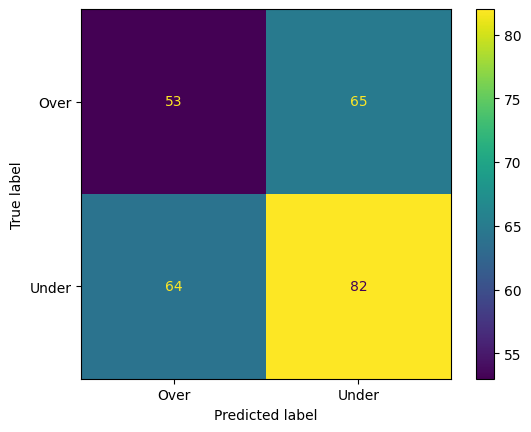


Results for 2023:
 Week  1: accuracy score=80.00%
 Week  2: accuracy score=68.75%
 Week  3: accuracy score=68.75%
 Week  4: accuracy score=75.00%
 Week  5: accuracy score=50.00%
 Week  6: accuracy score=50.00%
 Week  7: accuracy score=69.23%
 Week  8: accuracy score=53.33%
 Week  9: accuracy score=71.43%
 Week 10: accuracy score=35.71%
 Week 11: accuracy score=50.00%
 Week 12: accuracy score=75.00%
 Week 13: accuracy score=50.00%
 Week 14: accuracy score=41.67%
 Week 15: accuracy score=61.54%
 Week 16: accuracy score=42.86%
 Week 17: accuracy score=50.00%
 Week 18: accuracy score=64.29%
Season 2023: Total accuracy score=59.52%

Classification Report for 2023:
              precision    recall  f1-score   support

        Over       0.55      0.54      0.54       114
       Under       0.63      0.64      0.64       138

    accuracy                           0.60       252
   macro avg       0.59      0.59      0.59       252
weighted avg       0.59      0.60      0.59       252



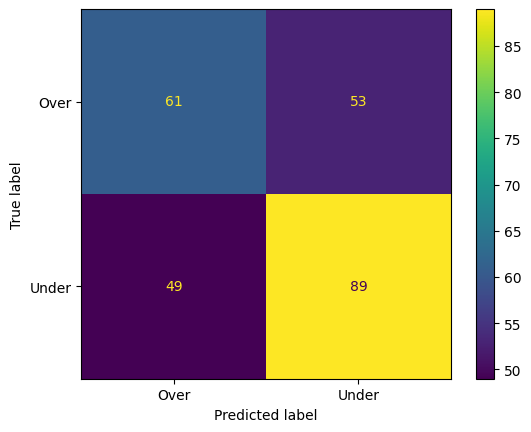

In [5]:
df = nfl_df.query('Home == 1').reset_index(drop=True)

features = ['Spread', 'Total']
target = 'Under'

for season in [2021, 2022, 2023]:
    print(f'\nResults for {season}:')

    y_preds = []
    y_trues = []

    for week in range(1, 19):

        print(f' Week {week:>2}:', end=' ')

        train_df = df.query('Season < @season or (Season == @season and Week < @week)')

        test_df = df.query('Season == @season and Week == @week and Actual_Total != Total')

        X_train = train_df[features]
        y_train = train_df[target]
        X_test = test_df[features]
        y_test = test_df[target]

        model = KNeighborsClassifier(n_neighbors=7)

        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', KNeighborsClassifier(n_neighbors=7))
        ])

        clf = pipe.fit(X_train, y_train)

        pipe2 = Pipeline([
            ('scaler', StandardScaler()),
            ('lof', LocalOutlierFactor(novelty=True))
        ])
        pipe2.fit(X_train)
        y_test_novelty = pipe2.predict(X_test)

        mask = [y == 1 for y in y_test_novelty]
        X_test = X_test[mask]
        y_test = y_test[mask]
        
        y_pred = clf.predict(X_test)

        if week == 1:
            y_test = test_df[target]
            y_pred = [1] * len(y_test)
        y_true = y_test

        print(f'accuracy score={accuracy_score(y_true, y_pred):.2%}')

        y_preds += list(y_pred)
        y_trues += list(y_true)

    print(f'Season {season}: Total accuracy score={accuracy_score(y_trues, y_preds):.2%}')
    print(f'\nClassification Report for {season}:')
    print(classification_report(y_trues, y_preds, target_names=['Over', 'Under']))

    cm = confusion_matrix(y_trues, y_preds)
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Over', 'Under'])
    display.plot()
    plt.grid(False)
    plt.show()


Results for 2021:
 Week  1: MAE=0.17
 Week  2: MAE=0.18
 Week  3: MAE=0.26
 Week  4: MAE=0.20
 Week  5: MAE=0.28
 Week  6: MAE=0.15
 Week  7: MAE=0.35
 Week  8: MAE=0.35
 Week  9: MAE=0.20
 Week 10: MAE=0.20
 Week 11: MAE=0.19
 Week 12: MAE=0.18
 Week 13: MAE=0.24
 Week 14: MAE=0.23
 Week 15: MAE=0.21
 Week 16: MAE=0.19
 Week 17: MAE=0.21
 Week 18: MAE=0.34
Season 2021: Total Mean Absolute Error=0.23
Total Mean Squared Error=0.11



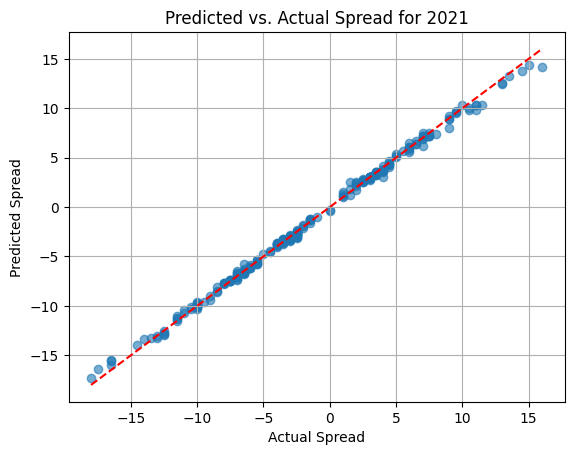


Results for 2022:
 Week  1: MAE=0.12
 Week  2: MAE=0.15
 Week  3: MAE=0.22
 Week  4: MAE=0.05
 Week  5: MAE=0.19
 Week  6: MAE=0.15
 Week  7: MAE=0.28
 Week  8: MAE=0.13
 Week  9: MAE=0.16
 Week 10: MAE=0.17
 Week 11: MAE=0.14
 Week 12: MAE=0.19
 Week 13: MAE=0.15
 Week 14: MAE=0.29
 Week 15: MAE=0.19
 Week 16: MAE=0.27
 Week 17: MAE=0.20
 Week 18: MAE=0.21
Season 2022: Total Mean Absolute Error=0.18
Total Mean Squared Error=0.09



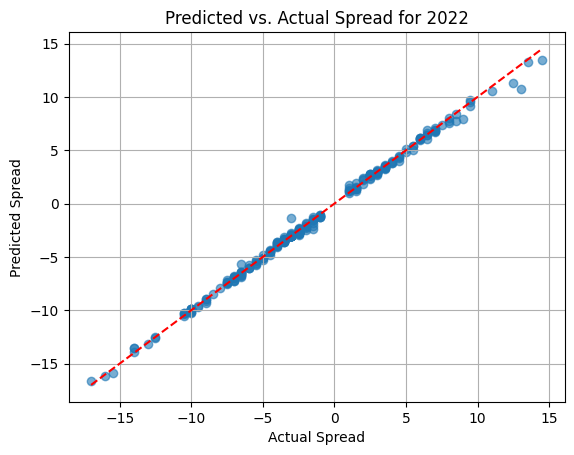


Results for 2023:
 Week  1: MAE=0.12
 Week  2: MAE=0.24
 Week  3: MAE=0.18
 Week  4: MAE=0.09
 Week  5: MAE=0.19
 Week  6: MAE=0.22
 Week  7: MAE=0.11
 Week  8: MAE=0.20
 Week  9: MAE=0.16
 Week 10: MAE=0.35
 Week 11: MAE=0.19
 Week 12: MAE=0.26
 Week 13: MAE=0.17
 Week 14: MAE=0.33
 Week 15: MAE=0.19
 Week 16: MAE=0.20
 Week 17: MAE=0.23
 Week 18: MAE=0.19
Season 2023: Total Mean Absolute Error=0.20
Total Mean Squared Error=0.11



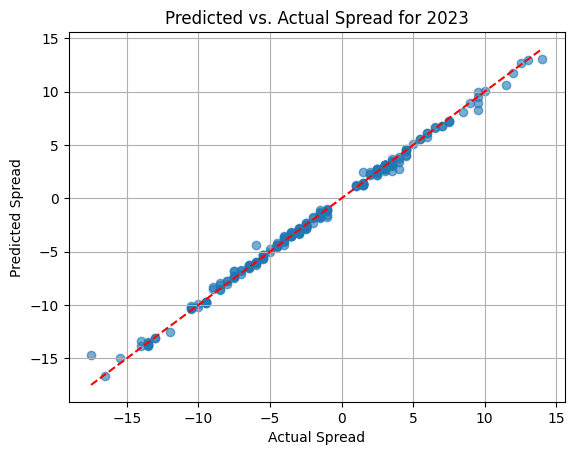

In [6]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

df = nfl_df.query('Home == 1').reset_index(drop=True)

# Set the features and target variable
features = ['Spread','Total']
target = 'Spread'

# Iterate over the seasons
for season in [2021, 2022, 2023]:
    print(f'\nResults for {season}:')

    # Lists to hold predictions and true values for each season
    y_preds = []
    y_trues = []

    # Iterate over the weeks in the season
    for week in range(1, 19):
        print(f' Week {week:>2}:', end=' ')

        # Split data into training and test sets
        train_df = df.query('Season < @season or (Season == @season and Week < @week)')
        test_df = df.query('Season == @season and Week == @week and Actual_Total != Total')

        X_train = train_df[features]
        y_train = train_df[target]
        X_test = test_df[features]
        y_test = test_df[target]

        # Pipeline with scaling and KNeighborsRegressor
        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('model', KNeighborsRegressor(n_neighbors=7))
        ])

        # Fit the regression model
        pipe.fit(X_train, y_train)

        # Predict the Spread values
        y_pred = pipe.predict(X_test)

        # Save true and predicted values for evaluation
        y_preds += list(y_pred)
        y_trues += list(y_test)

        # Print evaluation metrics for each week
        print(f'MAE={mean_absolute_error(y_test, y_pred):.2f}')

    # Season summary metrics
    print(f'Season {season}: Total Mean Absolute Error={mean_absolute_error(y_trues, y_preds):.2f}')
    print(f'Total Mean Squared Error={mean_squared_error(y_trues, y_preds):.2f}\n')

    # Plot predicted vs. actual spreads
    plt.scatter(y_trues, y_preds, alpha=0.6)
    plt.xlabel('Actual Spread')
    plt.ylabel('Predicted Spread')
    plt.title(f'Predicted vs. Actual Spread for {season}')
    plt.plot([min(y_trues), max(y_trues)], [min(y_trues), max(y_trues)], 'r--')
    plt.grid(True)
    plt.show()

In [ ]:
index = 0
for game_index, spread, total in X_test.itertuples():
    nbr_distance = clf.kneighbors(X_test)[0][index]
    nbr_index = clf.kneighbors(X_test)[1][index]
    index += 1

    print(f'GAME')
    print(df.iloc[[game_index],:][['Season','Week','Team','Opp','Spread','Total','Actual_Total','Under']])
    print(f'\nNEAREST NEIGHBORS (distances={[round(value, 2) for value in nbr_distance]})')
    print(df.iloc[nbr_index,:][['Season','Week','Team','Opp','Spread','Total','Actual_Total','Under']])
    print('\n')

In [8]:
df = nfl_df.query('Home == 1').reset_index(drop=True)

features = ['Spread', 'Total']
target = 'Under'

season = 2024
week = 10

train_df = df.query('Season < @season or (Season == @season and Week < @week)')

X_train = train_df[features]
y_train = train_df[target]

week1 = [
    ['Ravens @ Chiefs', -3.0, 46.5],
    ['Packers @ Eagles', -2.5, 49.0],
    ['Cardinals @ Bills', -5.5, 48.0],
    ['Panthers @ Saints', -4.0, 40.0],
    ['Texans @ Colts', +2.5, 49.0],
    ['Steelers @ Falcons', -3.0, 41.0],
    ['Titans @ Bears', -4.0, 44.5],
    ['Patriots @ Bengals', -9.0, 40.5],
    ['Cowboys @ Browns', -2.5, 43.0],
    ['Rams @ Lions', -3.5, 51.0],
    ['Jaguars @ Dolphins', -3.5, 49.0],
    ['Vikings @ Giants', +1.0, 41.0],
    ['Raiders @ Chargers', -3.5, 42.5],
    ['Broncos @ Seahawks', -5.0, 42.0],
    ['Commanders @ Buccaneers', -3.0, 42.5],
    ['Jets @ 49ers', -3.5, 44.0]
]

week2 = [
    ['Bills @ Dolphins', -2.5, 50.5],
    ['Chargers @ Panthers', +5.0, 42.5],
    ['Rams @ Cardinals', -1.0, 47.5],
    ['Saints @ Cowboys', -6.0, 44.5],
    ['Colts @ Packers', +2.5, 47.5],
    ['Steelers @ Broncos', +2.5, 41.0],
    ['Giants @ Commanders', -1.5, 43.0],
    ['Browns @ Jaguars', -3.0, 44.0],
    ['Bengals @ Chiefs', -6.0, 48.0],
    ['49ers @ Vikings', +5.0, 47.0],
    ['Seahawks @ Patriots', +3.5, 41.5],
    ['Jets @ Titans', +3.5, 44.5],
    ['Bucanners @ Lions', -7.5, 49.0],
    ['Raiders @ Ravens', -8.5, 44.0],
    ['Bears @ Texans', -6.5, 46.5],
    ['Falcons @ Eagles', -5.5, 47.5]
]

week3 = [
    ['Patriots @ Jets', -6.5, 42.0],
    ['Giants @ Browns', -6.5, 42.5],
    ['Bears @ Colts', -1.5, 46.5],
    ['Texans @ Vikings', +1.5, 46.5],
    ['Eagles @ Saints', -2.5, 45.0],
    ['Chargers @ Steelers', -2.5, 42.5],
    ['Broncos @ Buccaneers', -6.0, 42.5],
    ['Packers @ Titans', -3.0, 44.0],
    ['Panthers @ Raiders', -6.0, 42.0],
    ['Dolphins @ Seahawks', -4.5, 48.5],
    ['Lions @ Cardinals', +3.0, 50.0],
    ['Ravens @ Cowboys', +1.0, 48.0],
    ['49ers @ Rams', +6.5, 46.5],
    ['Chiefs @ Falcons', +3.0, 49.0],
    ['Jaguars @ Bills', -5.0, 48.5],
    ['Commanders @ Bengals', -7.5, 47.5]
]

week4 = [
    ['Cowboys @ Giants', +5.5, 44.5],
    ['Patriots @ 49ers', -10.5, 43.5],
    ['Bengals @ Panthers', +4.5, 45.5],
    ['Saints @ Falcons', -3.0, 44.5],
    ['Rams @ Bears', -3.0, 47.0],
    ['Vikings @ Packers', -3.0, 45.0],
    ['Eagles @ Buccaneers', +1.0, 47.0],
    ['Jaguars @ Texans', -5.5, 47.0],
    ['Steelers @ Colts', +2.0, 44.5],
    ['Broncos @ Jets', -8.0, 42.5],
    ['Commanders @ Cardinals', -3.5, 45.0],
    ['Browns @ Raiders', +2.5, 43.5],
    ['Chiefs @ Chargers', +7.5, 46.0],
    ['Bills @ Ravens', -2.5, 46.5],
    ['Titans @ Dolphins', -2.5, 46.0],
    ['Seahawks @ Lions', -3.5, 49.0]
]

week5 = [
    ['Buccaneers @ Falcons', -2.5, 44.5],
    ['Jets @ Vikings', -2.5, 42.5],
    ['Ravens @ Bengals', +2.5, 46.5],
    ['Dolphins @ Patriots', +1.0, 45],
    ['Panthers @ Bears', -4.0, 42.0],
    ['Bills @ Texans', -1.0, 47.5],
    ['Colts @ Jaguars', -3.0, 47.0],
    ['Browns @ Commanders', -3.5, 43.5],
    ['Raiders @ Broncos', -3.0, 41.0],
    ['Cardinals @ Niners', -7.0, 47.0],
    ['Packers @ Rams', +3.0, 48.0],
    ['Giants @ Seahawks', -7.0, 43.0],
    ['Cowboys @ Steelers', -2.5, 43.0],
    ['Saints @ Cheifs', -5.5, 43.5],
]

week6 = [
    ['Niners @ Seahawks', +3.5, 46.5],
    ['Jaguars @ Bears', -1.5, 44.5],
    ['Cardinals @ Packers', -5.0, 47.0],
    ['Texans @ Patriots', +7.0, 38.0],
    ['Commanders @ Ravens', -6.5, 51.5],
    ['Buccaneers @ Saints', +3.5, 41.5],
    ['Browns @ Eagles', -9.5, 42.5],
    ['Colts @ Titans', -2.5, 43.0],
    ['Chargers @ Broncos', +3.0, 36.0],
    ['Steelers @ Raiders', +3.0, 36.5],
    ['Falcons @ Panthers', +6.0, 47.0],
    ['Lions @ Cowboys', +3.0, 52.0],
    ['Bengals @ Giants', +3.5, 47.5],
    ['Bills @ Jets', +2.5, 41.0],
]

week7 = [
    ['Broncos @ Saints', +3.0, 41.5],  
    ['Patriots @ Jaguars', -6.0, 40.5], 
    ['Seahawks @ Falcons', -3.0, 47.0],
    ['Titans @ Bills', -9.5, 46.5],
    ['Bengals @ Browns', +5.5, 46.0],
    ['Texans @ Packers', -3.0, 48.5],
    ['Dolphins @ Colts', -3.0, 49.0],
    ['Lions @ Vikings', -1.5, 48.0],
    ['Eagles @ Giants', +3.5, 44.0],
    ['Raiders @ Rams', -7.0, 45.5],
    ['Panthers @ Commanders', -9.5, 41.0],
    ['Chiefs @ 49ers', -1.5, 47.5],
    ['Jets @ Steelers', +1.5, 43.0], 
    ['Ravens @ Buccaneers', +3.5, 44.5],
    ['Chargers @ Cardinals', +1.5, 47.0]  
]

week8 = [
    ['Vikings @ Rams', +2.5, 45.5],
    ['Ravens @ Browns', +8.5, 45.0],
    ['Colts @ Texans', -5.0, 47.5],
    ['Packers @ Jaguars', +3.5, 45.0],
    ['Cardinals @ Dolphins', -4.0, 48.5],
    ['Jets @ Patriots', +7.0, 40.5],
    ['Falcons @ Buccaneers', +2.5, 42.5],
    ['Eagles @ Bengals', -2.5, 47.5],
    ['Saints @ Chargers', -7.0, 42.5],
    ['Bills @ Seahawks', +3.0, 46.5],
    ['Panthers @ Broncos', -11.0, 40.5],
    ['Chiefs @ Raiders', +8.5, 46.0],
    ['Cowboys @ 49ers', -5.5, 46.5],
    ['Bears @ Commanders', -1.0, 44.5],  
    ['Titans @ Lions', -11.5, 47.5],     
    ['Giants @ Steelers', -6.0, 41.5]    
]

week9 = [
    ['Texans @ Jets', -2.5, 45.0],
    ['Cowboys @ Falcons', -3.0, 46.0],
    ['Dolphins @ Bills', -6.0, 47.5],
    ['Raiders @ Bengals', -7.0, 44.0],
    ['Chargers @ Browns', +1.5, 43.5],
    ['Patriots @ Titans', -3.5, 45.0],
    ['Commanders @ Giants', +4.0, 42.0],
    ['Saints @ Panthers', +7.0, 43.0],
    ['Broncos @ Ravens', -8.0, 41.0],
    ['Jaguars @ Eagles', -7.5, 47.0],
    ['Bears @ Cardinals', -1.5, 42.5],
    ['Lions @ Packers', +2.5, 44.5],
    ['Rams @ Seahawks', +1.5, 46.0],
    ['Colts @ Vikings', -5.5, 45.0],
    ['Buccaneers @ Chiefs', -8.5, 49.0]
]

week10 = [
    ['Bengals @ Ravens', -6.0, 46.0],
    ['Giants @ Panthers', +6.5, 40.5],
    ['Patriots @ Bears', -6.0, 42.0],
    ['Bills @ Colts', +4.0, 46.5],
    ['Broncos @ Chiefs', -7.5, 44.5],
    ['Falcons @ Saints', +3.5, 44.5],
    ['49ers @ Buccaneers', +6.5, 46.5],
    ['Steelers @ Commanders', -3.0, 43.5],
    ['Vikings @ Jaguars', +7.0, 44.5],
    ['Titans @ Chargers', -7.5, 42.5],
    ['Eagles @ Cowboys', +7.5, 48.0],
    ['Jets @ Cardinals', +1.5, 45.5],
    ['Lions @ Texans', +3.5, 50.0],
    ['Dolphins @ Rams', -1.5, 46.0]
]



X_new = pd.DataFrame(week10, columns=['Game', 'Spread', 'Total'])

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors=7))
])

clf = pipe.fit(X_train, y_train)

lof = LocalOutlierFactor(novelty=True)
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('lof', LocalOutlierFactor(novelty=True))
])
pipe2.fit(X_train)
y_test_novelty = pipe2.predict(X_new[features])

mask = [y == 1 for y in y_test_novelty]
X_new = X_new[mask]
        
y_pred = clf.predict(X_new[features])

if week == 1:
     y_pred = [1] * len(X_new)


X_new['KNC(7)'] = y_pred
X_new['KNC(7)'] = X_new['KNC(7)'].apply(lambda x: 'Under' if x == 1 else 'Over')

print(f'MODEL PREDICTIONS FOR WEEK {week} OF THE {season} NFL SEASON\n')
print(X_new[['Game','Spread','Total','KNC(7)']]) 

MODEL PREDICTIONS FOR WEEK 10 OF THE 2024 NFL SEASON

                     Game  Spread  Total KNC(7)
0        Bengals @ Ravens    -6.0   46.0   Over
1       Giants @ Panthers     6.5   40.5   Over
2        Patriots @ Bears    -6.0   42.0   Over
3           Bills @ Colts     4.0   46.5  Under
4        Broncos @ Chiefs    -7.5   44.5   Over
5        Falcons @ Saints     3.5   44.5  Under
6      49ers @ Buccaneers     6.5   46.5   Over
7   Steelers @ Commanders    -3.0   43.5  Under
8       Vikings @ Jaguars     7.0   44.5   Over
9       Titans @ Chargers    -7.5   42.5   Over
10       Eagles @ Cowboys     7.5   48.0  Under
11       Jets @ Cardinals     1.5   45.5  Under
12         Lions @ Texans     3.5   50.0  Under
13        Dolphins @ Rams    -1.5   46.0  Under


MODEL PREDICTIONS FOR WEEK 10 OF THE 2024 NFL SEASON

                     Game  Spread  Total  Predicted Spread
0        Bengals @ Ravens    -6.0   46.0         -6.142857
1       Giants @ Panthers     6.5   40.5          6.714286
2        Patriots @ Bears    -6.0   42.0         -6.142857
3           Bills @ Colts     4.0   46.5          3.714286
4        Broncos @ Chiefs    -7.5   44.5         -7.500000
5        Falcons @ Saints     3.5   44.5          3.214286
6      49ers @ Buccaneers     6.5   46.5          6.428571
7   Steelers @ Commanders    -3.0   43.5         -3.000000
8       Vikings @ Jaguars     7.0   44.5          6.928571
9       Titans @ Chargers    -7.5   42.5         -7.214286
10       Eagles @ Cowboys     7.5   48.0          7.357143
11       Jets @ Cardinals     1.5   45.5          1.428571
12         Lions @ Texans     3.5   50.0          3.285714
13        Dolphins @ Rams    -1.5   46.0         -1.214286


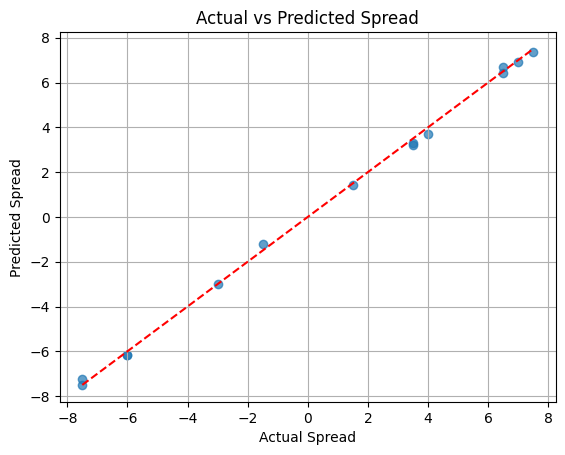

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import matplotlib.pyplot as plt

# Assuming nfl_df is pre-loaded with necessary data
df = nfl_df.query('Home == 1').reset_index(drop=True)

# Define features and target
features = ['Spread','Total']
target = 'Spread'

# Define the season and week
season = 2024
week = 10

# Split the data into training sets
train_df = df.query('Season < @season or (Season == @season and Week < @week)')
X_train = train_df[features]
y_train = train_df[target]

# Define games for week 1
week1 = [
    ['Ravens @ Chiefs', -3.0, 46.5],
    ['Packers @ Eagles', -2.5, 49.0],
    ['Cardinals @ Bills', -5.5, 48.0],
    ['Panthers @ Saints', -4.0, 40.0],
    ['Texans @ Colts', +2.5, 49.0],
    ['Steelers @ Falcons', -3.0, 41.0],
    ['Titans @ Bears', -4.0, 44.5],
    ['Patriots @ Bengals', -9.0, 40.5],
    ['Cowboys @ Browns', -2.5, 43.0],
    ['Rams @ Lions', -3.5, 51.0],
    ['Jaguars @ Dolphins', -3.5, 49.0],
    ['Vikings @ Giants', +1.0, 41.0],
    ['Raiders @ Chargers', -3.5, 42.5],
    ['Broncos @ Seahawks', -5.0, 42.0],
    ['Commanders @ Buccaneers', -3.0, 42.5],
    ['Jets @ 49ers', -3.5, 44.0]
]

week2 = [
    ['Bills @ Dolphins', -2.5, 50.5],
    ['Chargers @ Panthers', +5.0, 42.5],
    ['Rams @ Cardinals', -1.0, 47.5],
    ['Saints @ Cowboys', -6.0, 44.5],
    ['Colts @ Packers', +2.5, 47.5],
    ['Steelers @ Broncos', +2.5, 41.0],
    ['Giants @ Commanders', -1.5, 43.0],
    ['Browns @ Jaguars', -3.0, 44.0],
    ['Bengals @ Chiefs', -6.0, 48.0],
    ['49ers @ Vikings', +5.0, 47.0],
    ['Seahawks @ Patriots', +3.5, 41.5],
    ['Jets @ Titans', +3.5, 44.5],
    ['Bucanners @ Lions', -7.5, 49.0],
    ['Raiders @ Ravens', -8.5, 44.0],
    ['Bears @ Texans', -6.5, 46.5],
    ['Falcons @ Eagles', -5.5, 47.5]
]

week3 = [
    ['Patriots @ Jets', -6.5, 42.0],
    ['Giants @ Browns', -6.5, 42.5],
    ['Bears @ Colts', -1.5, 46.5],
    ['Texans @ Vikings', +1.5, 46.5],
    ['Eagles @ Saints', -2.5, 45.0],
    ['Chargers @ Steelers', -2.5, 42.5],
    ['Broncos @ Buccaneers', -6.0, 42.5],
    ['Packers @ Titans', -3.0, 44.0],
    ['Panthers @ Raiders', -6.0, 42.0],
    ['Dolphins @ Seahawks', -4.5, 48.5],
    ['Lions @ Cardinals', +3.0, 50.0],
    ['Ravens @ Cowboys', +1.0, 48.0],
    ['49ers @ Rams', +6.5, 46.5],
    ['Chiefs @ Falcons', +3.0, 49.0],
    ['Jaguars @ Bills', -5.0, 48.5],
    ['Commanders @ Bengals', -7.5, 47.5]
]

week4 = [
    ['Cowboys @ Giants', +5.5, 44.5],
    ['Patriots @ 49ers', -10.5, 43.5],
    ['Bengals @ Panthers', +4.5, 45.5],
    ['Saints @ Falcons', -3.0, 44.5],
    ['Rams @ Bears', -3.0, 47.0],
    ['Vikings @ Packers', -3.0, 45.0],
    ['Eagles @ Buccaneers', +1.0, 47.0],
    ['Jaguars @ Texans', -5.5, 47.0],
    ['Steelers @ Colts', +2.0, 44.5],
    ['Broncos @ Jets', -8.0, 42.5],
    ['Commanders @ Cardinals', -3.5, 45.0],
    ['Browns @ Raiders', +2.5, 43.5],
    ['Chiefs @ Chargers', +7.5, 46.0],
    ['Bills @ Ravens', -2.5, 46.5],
    ['Titans @ Dolphins', -2.5, 46.0],
    ['Seahawks @ Lions', -3.5, 49.0]
]

week5 = [
    ['Buccaneers @ Falcons', -2.5, 44.5],
    ['Jets @ Vikings', -2.5, 42.5],
    ['Ravens @ Bengals', +2.5, 46.5],
    ['Dolphins @ Patriots', +1.0, 45],
    ['Panthers @ Bears', -4.0, 42.0],
    ['Bills @ Texans', -1.0, 47.5],
    ['Colts @ Jaguars', -3.0, 47.0],
    ['Browns @ Commanders', -3.5, 43.5],
    ['Raiders @ Broncos', -3.0, 41.0],
    ['Cardinals @ Niners', -7.0, 47.0],
    ['Packers @ Rams', +3.0, 48.0],
    ['Giants @ Seahawks', -7.0, 43.0],
    ['Cowboys @ Steelers', -2.5, 43.0],
    ['Saints @ Cheifs', -5.5, 43.5],
]

week6 = [
    ['Niners @ Seahawks', +3.5, 46.5],
    ['Jaguars @ Bears', -1.5, 44.5],
    ['Cardinals @ Packers', -5.0, 47.0],
    ['Texans @ Patriots', +7.0, 38.0],
    ['Commanders @ Ravens', -6.5, 51.5],
    ['Buccaneers @ Saints', +3.5, 41.5],
    ['Browns @ Eagles', -9.5, 42.5],
    ['Colts @ Titans', -2.5, 43.0],
    ['Chargers @ Broncos', +3.0, 36.0],
    ['Steelers @ Raiders', +3.0, 36.5],
    ['Falcons @ Panthers', +6.0, 47.0],
    ['Lions @ Cowboys', +3.0, 52.0],
    ['Bengals @ Giants', +3.5, 47.5],
    ['Bills @ Jets', +2.5, 41.0],
]

week7 = [
    ['Broncos @ Saints', +3.0, 41.5],  
    ['Patriots @ Jaguars', -6.0, 40.5], 
    ['Seahawks @ Falcons', -3.0, 47.0],
    ['Titans @ Bills', -9.5, 46.5],
    ['Bengals @ Browns', +5.5, 46.0],
    ['Texans @ Packers', -3.0, 48.5],
    ['Dolphins @ Colts', -3.0, 49.0],
    ['Lions @ Vikings', -1.5, 48.0],
    ['Eagles @ Giants', +3.5, 44.0],
    ['Raiders @ Rams', -7.0, 45.5],
    ['Panthers @ Commanders', -9.5, 41.0],
    ['Chiefs @ 49ers', -1.5, 47.5],
    ['Jets @ Steelers', +1.5, 43.0], 
    ['Ravens @ Buccaneers', +3.5, 44.5],
    ['Chargers @ Cardinals', +1.5, 47.0]  
]

week8 = [
    ['Vikings @ Rams', +2.5, 45.5],
    ['Ravens @ Browns', +8.5, 45.0],
    ['Colts @ Texans', -5.0, 47.5],
    ['Packers @ Jaguars', +3.5, 45.0],
    ['Cardinals @ Dolphins', -4.0, 48.5],
    ['Jets @ Patriots', +7.0, 40.5],
    ['Falcons @ Buccaneers', +2.5, 42.5],
    ['Eagles @ Bengals', -2.5, 47.5],
    ['Saints @ Chargers', -7.0, 42.5],
    ['Bills @ Seahawks', +3.0, 46.5],
    ['Panthers @ Broncos', -11.0, 40.5],
    ['Chiefs @ Raiders', +8.5, 46.0],
    ['Cowboys @ 49ers', -5.5, 46.5],
    ['Bears @ Commanders', -1.0, 44.5],  
    ['Titans @ Lions', -11.5, 47.5],     
    ['Giants @ Steelers', -6.0, 41.5]    
]

week9 = [
    ['Texans @ Jets', -2.5, 45.0],
    ['Cowboys @ Falcons', -3.0, 46.0],
    ['Dolphins @ Bills', -6.0, 47.5],
    ['Raiders @ Bengals', -7.0, 44.0],
    ['Chargers @ Browns', +1.5, 43.5],
    ['Patriots @ Titans', -3.5, 45.0],
    ['Commanders @ Giants', +4.0, 42.0],
    ['Saints @ Panthers', +7.0, 43.0],
    ['Broncos @ Ravens', -8.0, 41.0],
    ['Jaguars @ Eagles', -7.5, 47.0],
    ['Bears @ Cardinals', -1.5, 42.5],
    ['Lions @ Packers', +2.5, 44.5],
    ['Rams @ Seahawks', +1.5, 46.0],
    ['Colts @ Vikings', -5.5, 45.0],
    ['Buccaneers @ Chiefs', -8.5, 49.0]
]

week10 = [
    ['Bengals @ Ravens', -6.0, 46.0],
    ['Giants @ Panthers', +6.5, 40.5],
    ['Patriots @ Bears', -6.0, 42.0],
    ['Bills @ Colts', +4.0, 46.5],
    ['Broncos @ Chiefs', -7.5, 44.5],
    ['Falcons @ Saints', +3.5, 44.5],
    ['49ers @ Buccaneers', +6.5, 46.5],
    ['Steelers @ Commanders', -3.0, 43.5],
    ['Vikings @ Jaguars', +7.0, 44.5],
    ['Titans @ Chargers', -7.5, 42.5],
    ['Eagles @ Cowboys', +7.5, 48.0],
    ['Jets @ Cardinals', +1.5, 45.5],
    ['Lions @ Texans', +3.5, 50.0],
    ['Dolphins @ Rams', -1.5, 46.0]
]


# Create a DataFrame for the new week's games
X_new = pd.DataFrame(week10, columns=['Game', 'Spread', 'Total'])

# Create a pipeline with StandardScaler and KNeighborsRegressor
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=7))
])

# Fit the regression model
clf = pipe.fit(X_train, y_train)

# Outlier detection using LocalOutlierFactor
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('lof', LocalOutlierFactor(novelty=True))
])
pipe2.fit(X_train)
y_test_novelty = pipe2.predict(X_new[features])

# Mask to filter out detected outliers
mask = [y == 1 for y in y_test_novelty]
X_new = X_new[mask]

# Predict spreads using the regression model
y_pred = clf.predict(X_new[features])

# Add the predictions to the DataFrame
X_new['Predicted Spread'] = y_pred

# Print the results
print(f'MODEL PREDICTIONS FOR WEEK {week} OF THE {season} NFL SEASON\n')
print(X_new[['Game', 'Spread', 'Total', 'Predicted Spread']])

# Plotting the actual vs predicted spreads
plt.scatter(X_new['Spread'], X_new['Predicted Spread'], alpha=0.7)
plt.xlabel('Actual Spread')
plt.ylabel('Predicted Spread')
plt.title('Actual vs Predicted Spread')
plt.plot([min(X_new['Spread']), max(X_new['Spread'])], [min(X_new['Spread']), max(X_new['Spread'])], 'r--')
plt.grid(True)
plt.show()
